In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn
seaborn.set()

In [5]:
df = pd.read_csv('F:\\Udemy Courses\\Udemy - Machine Learning\\Py-Master\\ML\\1_linear_reg\\homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Prices')

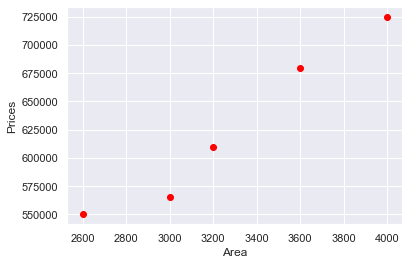

In [6]:
plt.scatter(df.area,df.price,color='red')
plt.xlabel('Area')
plt.ylabel('Prices')

In [7]:
x=df[['area']]
y=df['price']
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.predict([[3300]])

array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [11]:
m=135.78767123
b=180616.43835616432
yhat=m*x+b

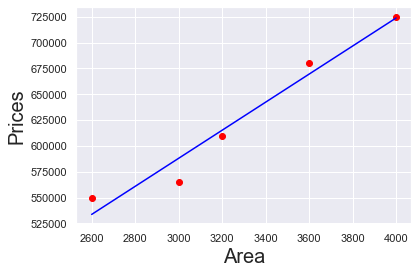

In [12]:
plt.scatter(df.area,df.price,color='red')
plt.xlabel('Area', fontsize=20)
plt.ylabel('Prices', fontsize=20)
plt.plot(x,yhat,color='blue')

In [13]:
df_1=pd.read_csv('F:\\Udemy Courses\\Udemy - Machine Learning\\Py-Master\\ML\\1_linear_reg\\areas.csv')
sample_price=reg.predict(df_1)
sample_price

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
df_1.head(3)

,area
0,1000
1,1500
2,2300


In [15]:
df_1['prices']=sample_price
df_1

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
import statsmodels.api as sm

In [17]:
x1 = sm.add_constant(x)
sm_model = sm.OLS(y,x1).fit()
sm_model.summary()

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     69.17
Date:                Sun, 06 Oct 2019   Prob (F-statistic):            0.00364
Time:                        14:46:34   Log-Likelihood:                -54.709
No. Observations:                   5   AIC:                             113.4
Df Residuals:                       3   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.806e+05   5.41e+04      3.337      0.044    8346.956    3.53e+05
area         135.7877     16.327      8.317      0.004      83.828     187.748
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.352
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.408
Skew:                          -0.528   Prob(JB):                        0.816
Kurtosis:                       2.081   Cond. No.                     2.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
reg.predict([[5000]])

array([859554.79452055])

In [19]:
#Saving model using pickle
import pickle

In [21]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [22]:
#Now model is saved in working directory

In [23]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [24]:
#mp is an object of model
mp.predict([[5000]])

array([859554.79452055])

In [26]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [27]:
#Save model using joblib
import joblib

In [28]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [29]:
mp2=joblib.load('model_joblib')

In [30]:
mp2.predict([[5000]])

array([859554.79452055])